<a href="https://colab.research.google.com/github/Julian-mrq/AI-trading-bots/blob/main/LSTM_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librairies**

In [ ]:
import pandas as pd
import numpy as np
from types import SimpleNamespace
import yfinance as yf
import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

**Variables**

In [ ]:
params = SimpleNamespace(
    stock = 'AAPL',
    start = '2012-01-01',
    end = datetime.date.today(),
    test_size = 0.25,
    optimizer = 'adam',
    loss = 'mean_squared_error',
    batch_size = 30,
    epochs = 20,
    dropout = 0.2
  )

In [ ]:
data = yf.download(params.stock, start=params.start, end=params.end)

[*********************100%***********************]  1 of 1 completed


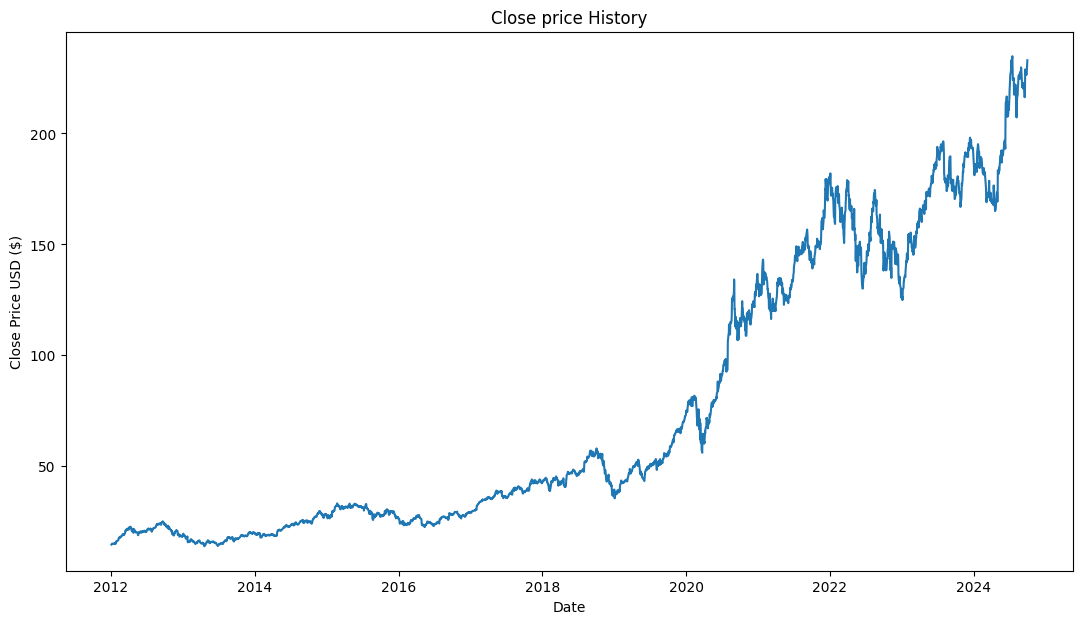

In [ ]:
def stock_display(data):
  plt.figure(figsize = (13,7))
  plt.title('Close price History')
  plt.plot(data['Close'])
  plt.xlabel('Date')
  plt.ylabel('Close Price USD ($)')
  plt.show()

stock_display(data)

In [ ]:
def stock_candlestick_display(data):
  figure = go.Figure(
      data = [
          go.Candlestick(
              x = data.index,
              low = data['Low'],
              high = data['High'],
              close = data['Close'],
              open = data['Open'],
              increasing_line_color = 'green',
              decreasing_line_color = 'red'
          )
      ]
  )

  figure.update_layout(
      xaxis_title = 'Date',
      yaxis_title = 'USD ($)'
  )

  figure.show()

stock_candlestick_display(data)

**Scale & split**

In [ ]:
X = data.drop(columns=['Close'])
# X = X[:int(len(X) - 1)]
y = data.filter(['Close'])
# y = y[:int(len(y) - 1)]

def scale_data(y):
  # scaler = MinMaxScaler(feature_range=(0,300))
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(y)

  return scaled_data

y = scale_data(data)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= params.test_size)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**Model**

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)),
    Dropout(params.dropout),
    LSTM(50, return_sequences=True),
    Dropout(params.dropout),
    LSTM(50, return_sequences=False),
    Dropout(params.dropout),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=params.optimizer,
    loss=params.loss
    )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



**Train model**

In [ ]:
model.fit(x_train, y_train, batch_size=params.batch_size, epochs=params.epochs)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 0.6558
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4680
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4609
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4220
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4516
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4302
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4716
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4617
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4361
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4224
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4442
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4686
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4480
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4495
Epoch 15/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4687
Epo

**Test**

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
# rmse = np.sqrt(mean_squared_error(y_test, predictions))
# print(f'RMSE = {rmse:2.2f}')

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [ ]:
train = data[:x_train.shape[0]]
valid = data[x_train.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-12-980859ad5e4b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Visualization**

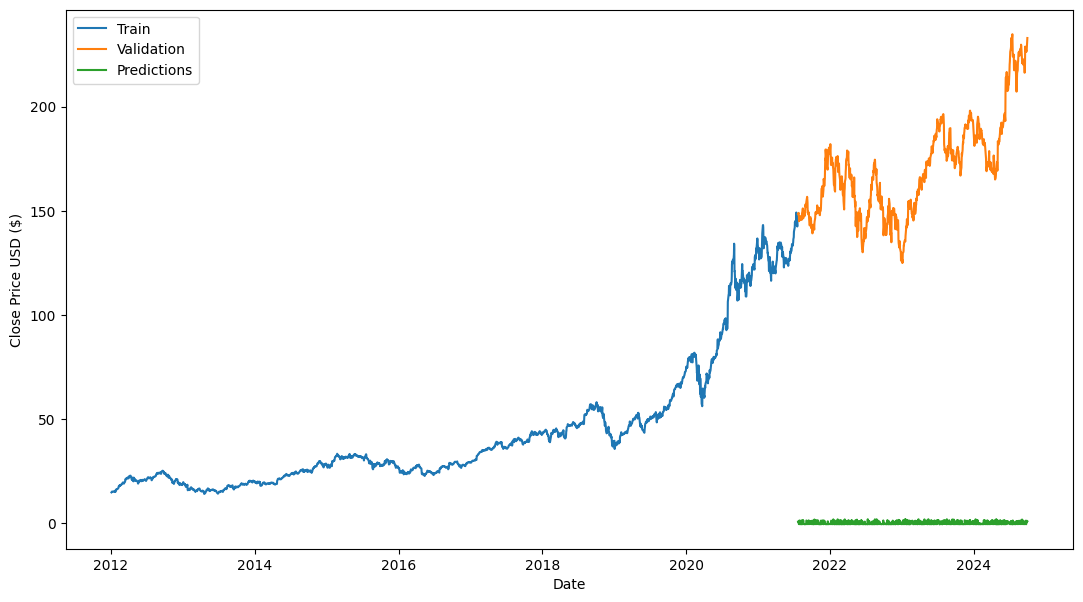

In [ ]:
def display_predictions(train, valid):
  plt.figure(figsize=(13,7))
  plt.xlabel('Date')
  plt.ylabel('Close Price USD ($)')
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Validation', 'Predictions'])

display_predictions(train, valid)